# Decision Tree on Iris Data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
import graphviz
#from util import visualize_iris


In [2]:
# load iris petal data set
iris = load_iris()
X = iris.data
y = iris.target
x_data= pd.DataFrame(X)
y_data= pd.DataFrame(y)
iris_data= pd.concat([x_data,y_data],axis=1)
iris_data.columns= ['sepal_width','sepal_length','petal_width', 'petal_length','target']
iris_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,sepal_width,sepal_length,petal_width,petal_length,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


The Model

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.drop('target', 1), 
                                                    iris_data['target'], test_size = .2, random_state=10) 

In [22]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# look at the importance of each feature
print(dt.feature_importances_)
print(dt.score(X, y))


[0.01733323 0.01264486 0.32189505 0.64812687]
0.9866666666666667


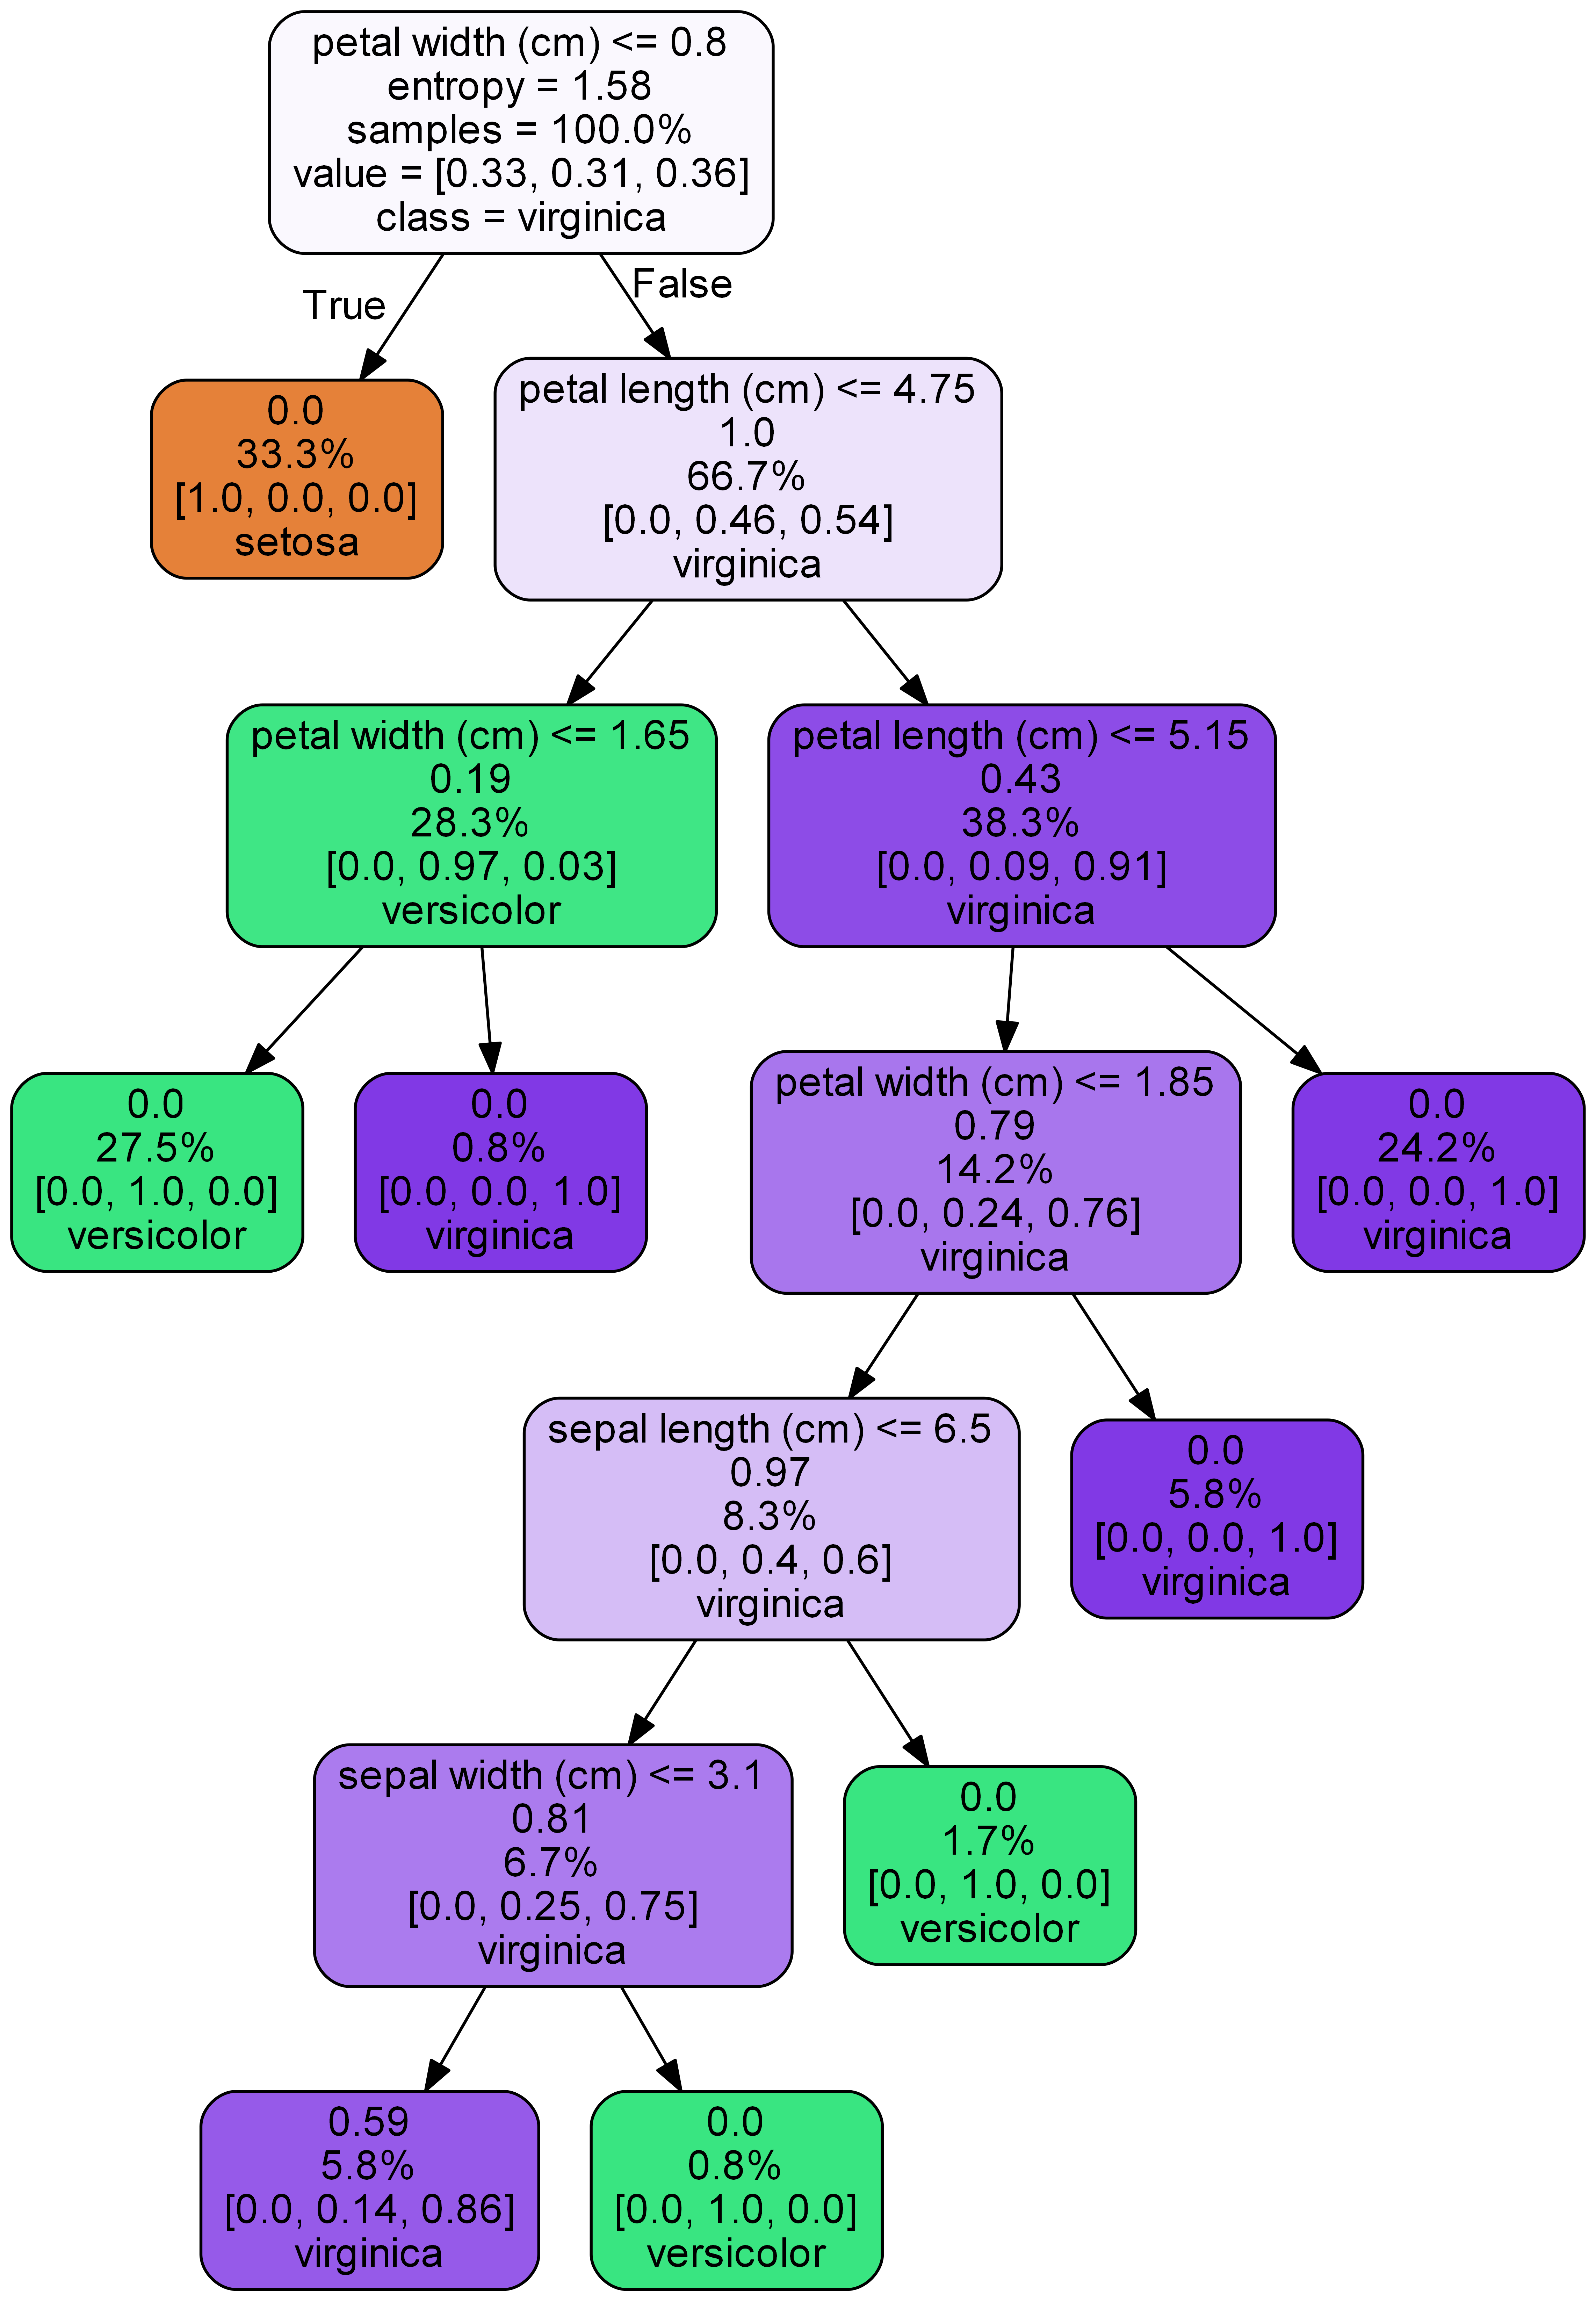

In [24]:
export_graphviz(dt, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'iris_dt.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'iris_dt.png')

In [25]:
y_predict = dt.predict(X_test)
y_pred_quant = dt.predict_proba(X_test)[:, 1]
y_pred_bin = dt.predict(X_test)

In [26]:
from sklearn.metrics import classification_report ,accuracy_score #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.metrics import roc_curve, auc

In [27]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred_bin))
print(" Accuracy of Model is : ",accuracy_score(y_test, y_pred_bin))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

 Accuracy of Model is :  0.9666666666666667


# Conclusion

Model Accuracy is 96.66%.